In [9]:
import pandas as pd


In [10]:
car_data="C:/Users/Venati Himanth/OneDrive/Desktop/strive/python/ML/Decision tree and random forest/car.data"

In [13]:
df=pd.read_csv(car_data)

In [14]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [23]:
column=['buying','maintain','doors','persons','lug_boot','saftey','class_values']

In [24]:
df=pd.read_csv(car_data,names=column)

In [25]:
df

,buying,maintain,doors,persons,lug_boot,saftey,class_values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [69]:
df['class_values'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [68]:
df['lug_boot'].value_counts()


small    576
med      576
big      576
Name: lug_boot, dtype: int64

In [27]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
from sklearn.preprocessing import LabelEncoder

In [37]:
#lable_enc=LabelEncoder()
#lable_enc.fit_transform(df['buying'])
#lable_enc.fit_transform(df['buying'])

In [39]:
from sklearn import preprocessing

In [43]:
df1=df.apply(LabelEncoder().fit_transform)

In [45]:
x=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

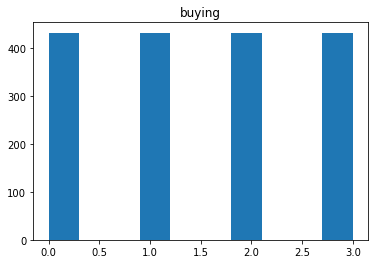

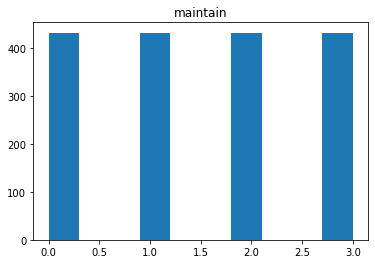

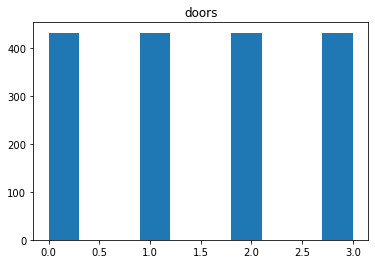

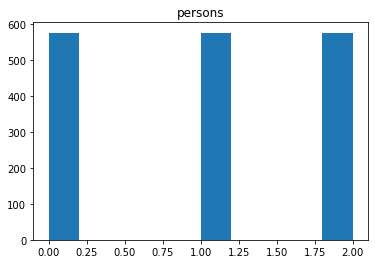

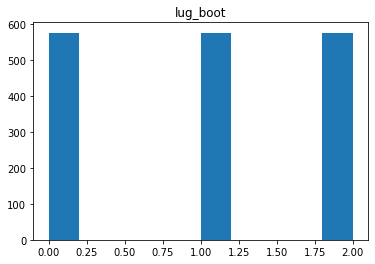

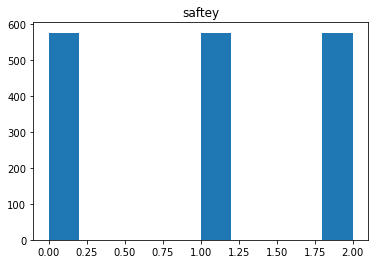

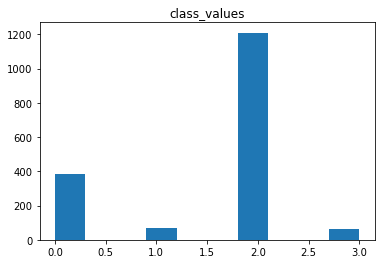

In [49]:
import matplotlib.pyplot as plt
for col_name in df1.columns:
        plt.figure()
        plt.hist(df1[col_name])
        plt.title(col_name)

In [60]:
from sklearn.tree import DecisionTreeClassifier


In [62]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

In [63]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf = dt_clf.fit(x_train, y_train)

In [87]:

y_pred = dt_clf.predict(x_test)


In [88]:
dt_clf.fit(x_train,y_train)
print('Accuracy=',dt_clf.score(x_test,y_test)*100,'%')


Accuracy= 97.10982658959537 %


In [89]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))



[[111   6   1   0]
 [  1  18   0   0]
 [  4   0 354   0]
 [  3   0   0  21]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       118
           1       0.75      0.95      0.84        19
           2       1.00      0.99      0.99       358
           3       1.00      0.88      0.93        24

    accuracy                           0.97       519
   macro avg       0.92      0.94      0.93       519
weighted avg       0.97      0.97      0.97       519

0.9710982658959537


[Text(1815.016304347826, 3152.88, 'persons <= 0.5\ngini = 0.452\nsamples = 1209\nvalue = [266, 50, 852, 41]\nclass = vgood'),
 Text(1766.4945652173913, 2935.44, 'gini = 0.0\nsamples = 393\nvalue = [0, 0, 393, 0]\nclass = vgood'),
 Text(1863.5380434782608, 2935.44, 'saftey <= 0.5\ngini = 0.571\nsamples = 816\nvalue = [266, 50, 459, 41]\nclass = vgood'),
 Text(1000.7608695652174, 2718.0, 'maintain <= 2.5\ngini = 0.627\nsamples = 273\nvalue = [147, 21, 64, 41]\nclass = unacc'),
 Text(545.8695652173913, 2500.56, 'buying <= 0.5\ngini = 0.613\nsamples = 202\nvalue = [114, 21, 26, 41]\nclass = unacc'),
 Text(145.56521739130434, 2283.12, 'doors <= 0.5\ngini = 0.103\nsamples = 55\nvalue = [52, 0, 3, 0]\nclass = unacc'),
 Text(97.04347826086956, 2065.68, 'lug_boot <= 1.5\ngini = 0.337\nsamples = 14\nvalue = [11, 0, 3, 0]\nclass = unacc'),
 Text(48.52173913043478, 1848.24, 'gini = 0.0\nsamples = 9\nvalue = [9, 0, 0, 0]\nclass = unacc'),
 Text(145.56521739130434, 1848.24, 'persons <= 1.5\ngini = 0

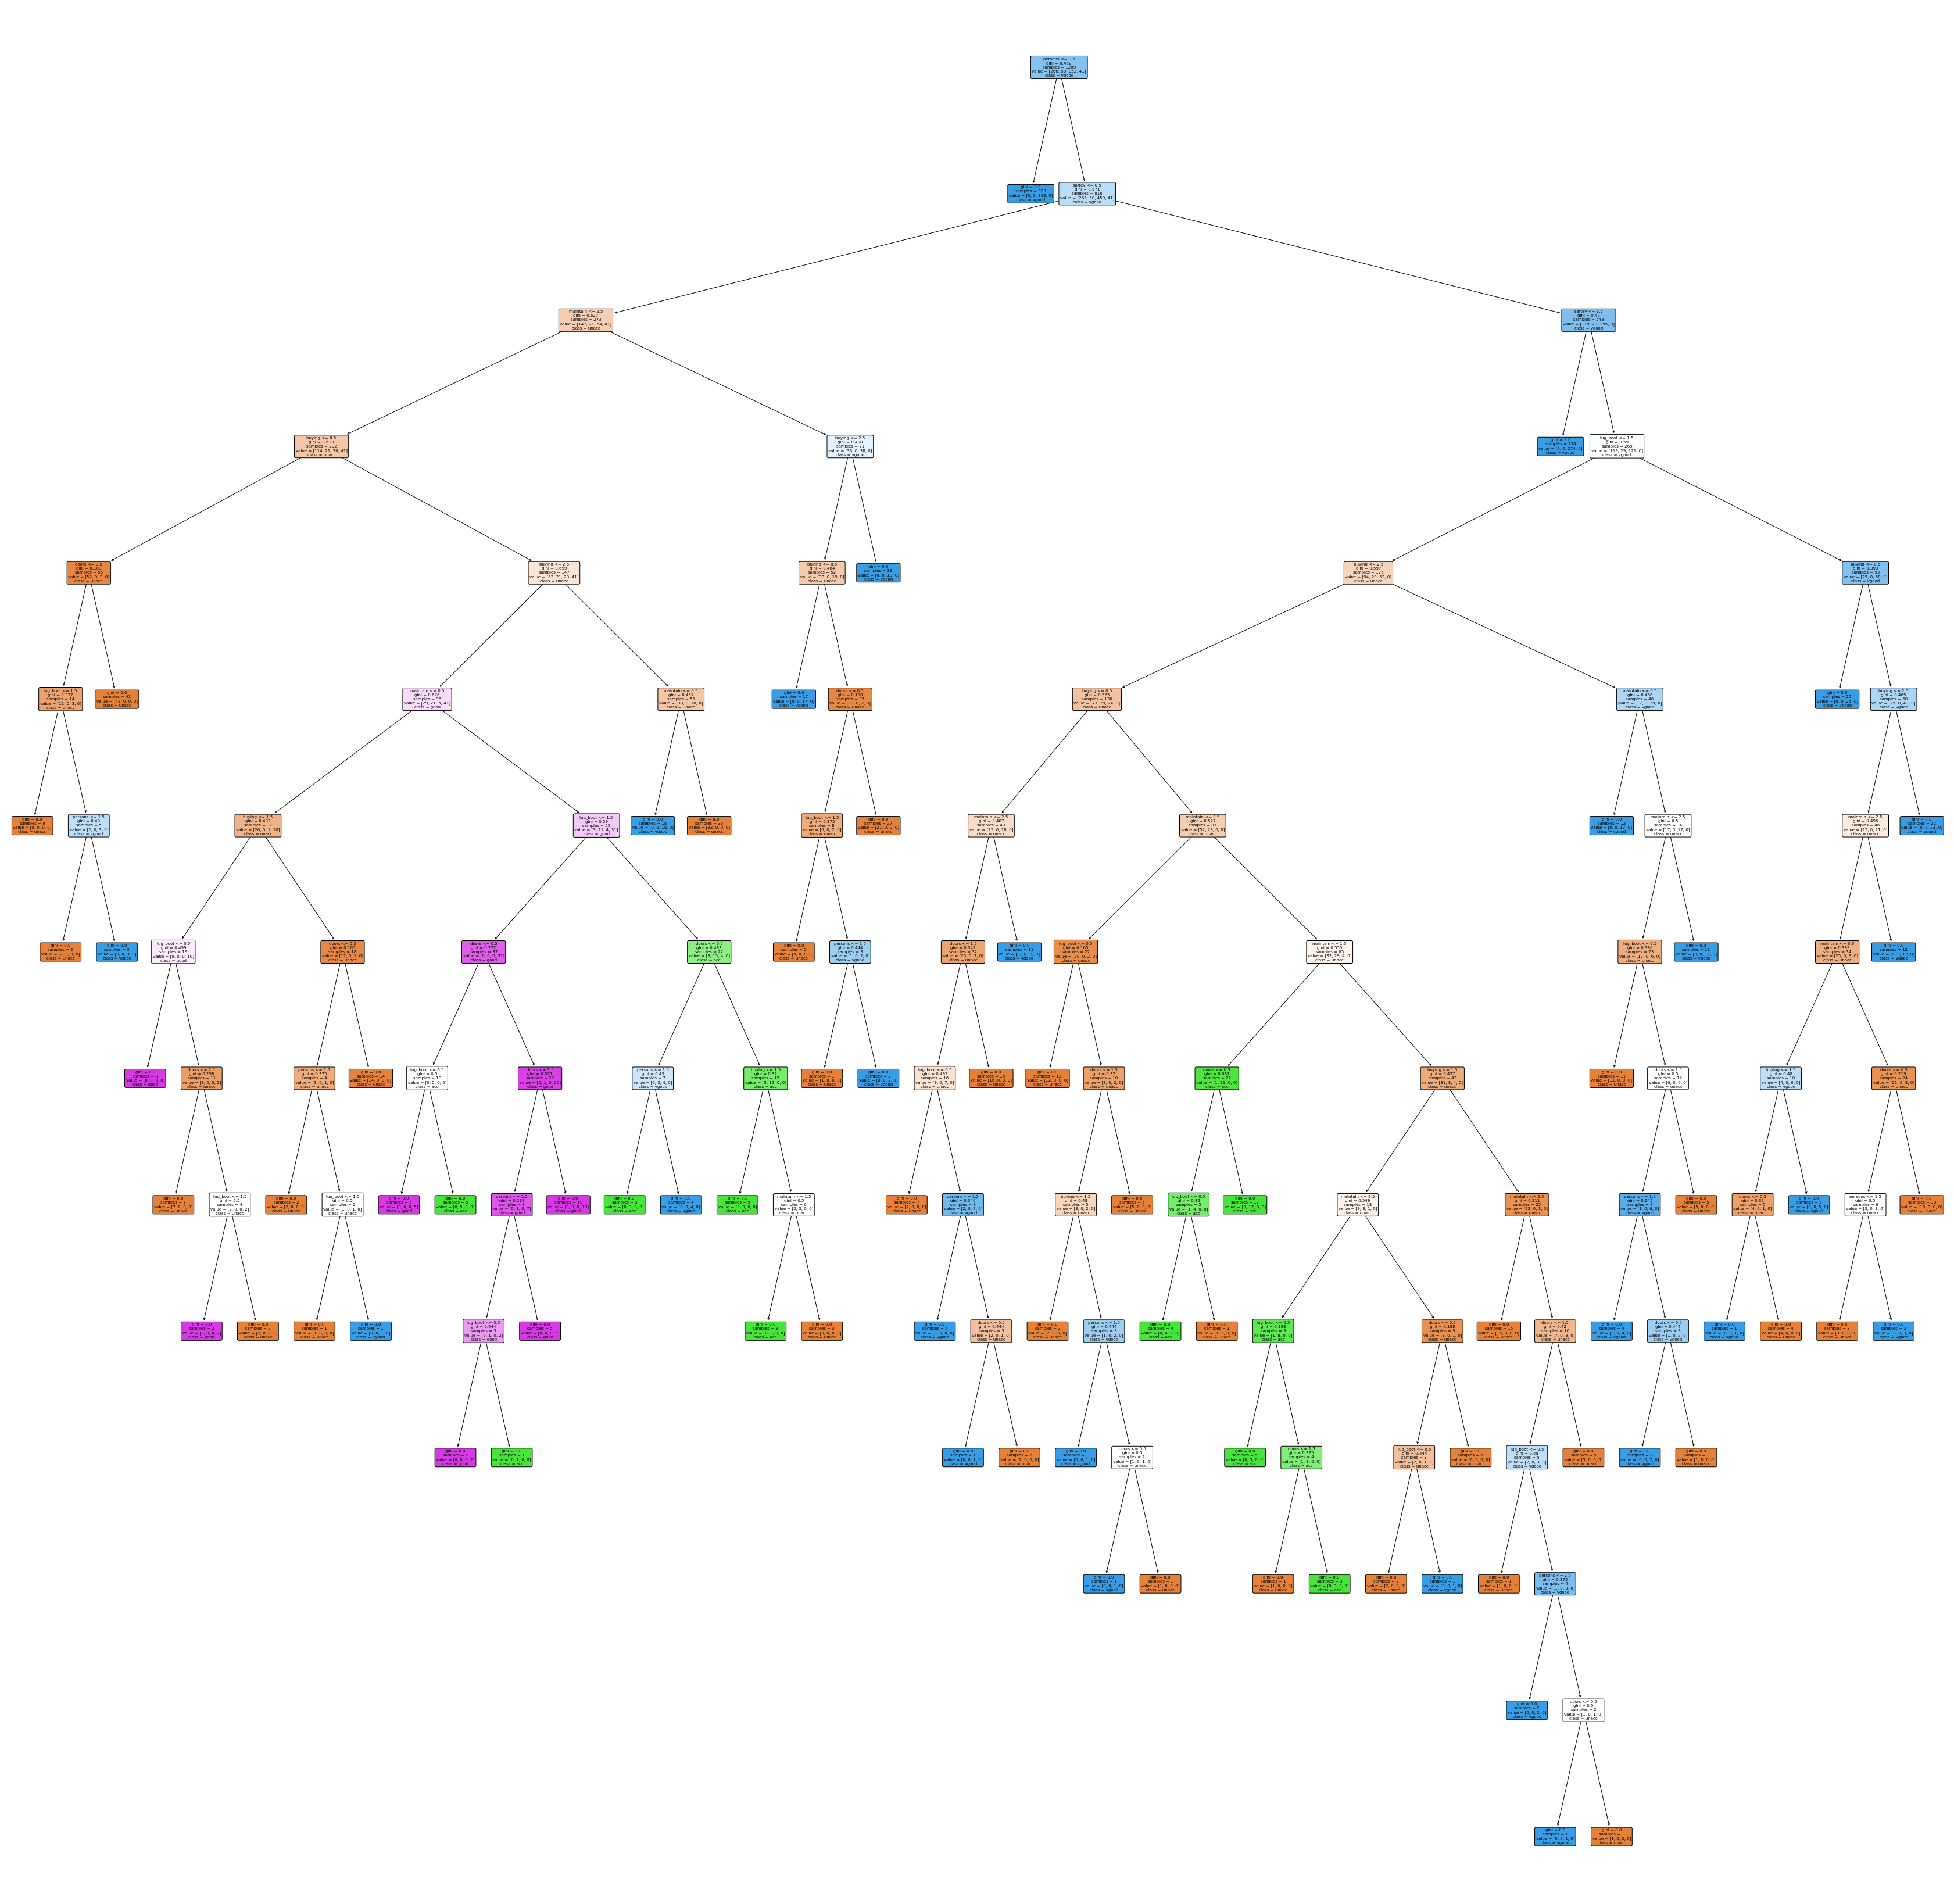

In [73]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,60))
plot_tree(dt_clf,
          filled=True,
          rounded=True,
          class_names=['unacc', 'acc', 'vgood', 'good'],
         feature_names=x.columns)

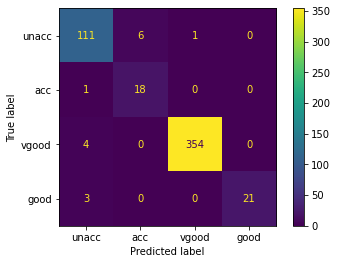

In [74]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dt_clf, x_test, y_test, display_labels=['unacc', 'acc', 'vgood', 'good'])

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
#random=RandomForestClassifier()
#classifier = RandomForestClassifier(n_estimators=20, random_state=42)
#y_pred = classifier.predict(x_test)

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)



In [95]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


[[110   5   2   1]
 [  1  17   0   1]
 [  4   0 354   0]
 [  3   0   0  21]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       118
           1       0.77      0.89      0.83        19
           2       0.99      0.99      0.99       358
           3       0.91      0.88      0.89        24

    accuracy                           0.97       519
   macro avg       0.90      0.92      0.91       519
weighted avg       0.97      0.97      0.97       519

0.9672447013487476


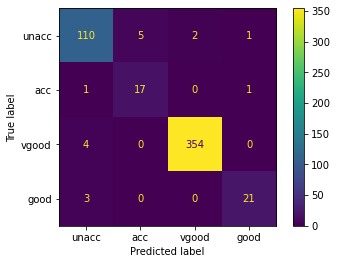

In [96]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(regressor, x_test, y_test, display_labels=['unacc', 'acc', 'vgood', 'good'])